In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Importing the datasets

df = pd.read_csv('/content/drive/MyDrive/User_Data.csv')

In [ ]:
#viewing the dataset
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Now, to predict whether a user will purchase the product or not, one needs to find out the relationship between Age and Estimated Salary. Here User ID and Gender are not important factors for finding out this.

In [ ]:
# input
x = df.iloc[:, [2, 3]].values

# output
y = df.iloc[:, 4].values

**Splitting The Dataset: Train and Test dataset**

Splitting the dataset to train and test. 75% of data is used for training the model and 25% of it is used to test the performance of our model.  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


Now, it is very important to perform feature scaling here because Age and Estimated Salary values lie in different ranges. If we don’t scale the features then the Estimated Salary feature will dominate the Age feature when the model finds the nearest neighbor to a data point in the data space.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

print (X_train[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


Here once see that Age and Estimated salary features values are scaled and now there in the -1 to 1. Hence, each feature will contribute equally to decision making i.e. finalizing the hypothesis.

Finally, we are training our Logistic Regression model.

Train The Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

After training the model, it is time to use it to do predictions on testing data.

In [ ]:
y_pred = classifier.predict(X_test)


Let’s test the performance of our model – Confusion Matrix

Evaluation Metrics
Metrics are used to check the model performance on predicted values and actual values.

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


Out of 100 :
True Positive + True Negative = 65 + 24
False Positive + False Negative = 3 + 8
Performance measure – Accuracy

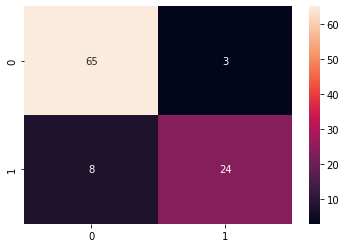

In [ ]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.89


Visualizing the performance of our model.

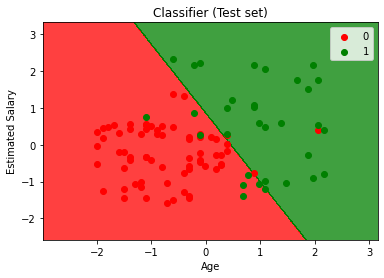

In [ ]:

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.
The MNIST dataset doesn’t come from within scikit-learn

In [ ]:
from sklearn.datasets import fetch_openml
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)


In [ ]:
mnist= X,y

In [ ]:
# There are 70,000 images (28 by 28 images for a dimensionality of 784)
print(X.shape)
# These are the labels
print(y.shape)

(70000, 784)
(70000,)


Splitting Data into Training and Test Sets (MNIST)
The code below performs a train test split. test_size=1/7.0 makes the training set size 60,000 images and the test set size 10,000 images.

In [ ]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
 X, y, test_size=1/7.0, random_state=0)

Showing the Images and Labels (MNIST)

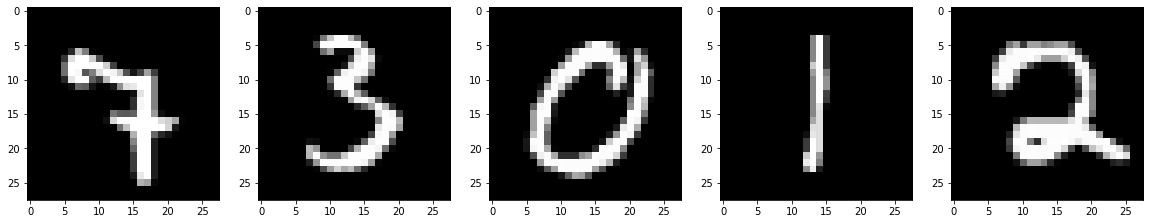

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 #plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (digits) and y (labels)

In [ ]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Predict the labels of new data (new images)
Uses the information the model learned during the model training process

In [ ]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

Predict for Multiple Observations (images) at Once



In [ ]:
logisticRegr.predict(test_img[0:10])


array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

Make predictions on entire test data



In [ ]:
predictions = logisticRegr.predict(test_img)


In [ ]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9184


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
 if label != predict:
  misclassifiedIndexes.append(index)
  index +=1

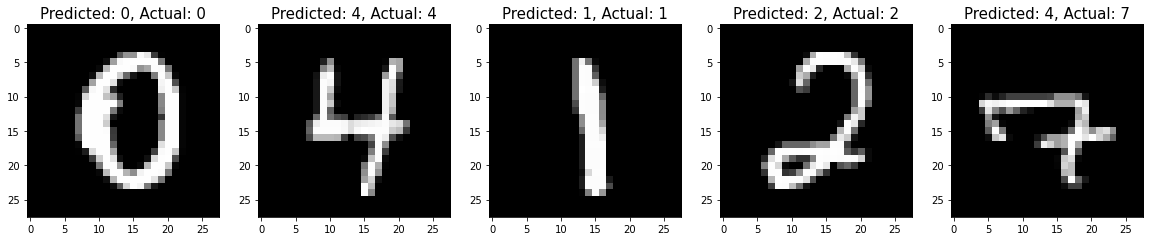

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [ ]:
cm = metrics.confusion_matrix(test_lbl, predictions)
print(cm)


[[ 968    0    1    1    2   10    8    2    4    0]
 [   0 1115    6    2    1    4    0    4    7    2]
 [   4   12  933   15   12    1   15    9   35    4]
 [   1    5   35  892    0   25    3   12   27   13]
 [   1    2    5    0  898    1   11   10    6   28]
 [   8    2    8   31    9  746   13    5   33    8]
 [   8    3    8    0   11   17  936    2    4    0]
 [   2    5   15    4   11    2    1  980    4   40]
 [   4   20   11   18    7   28    9    2  854   10]
 [   4    4    5   10   34    8    2   32    8  862]]


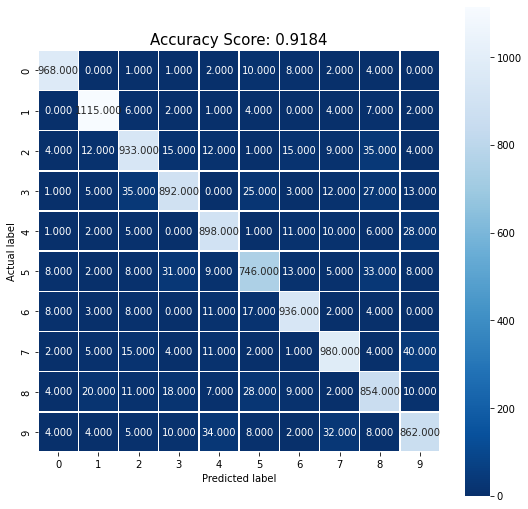

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);